In [1]:
import os
import pandas as pd
import plotting
import importlib
importlib.reload(plotting)

<module 'plotting' from '/home/frankwoods/Desktop/lassie/plotting.py'>

# Load in all depth vs resistance curves into a dataframe list

In [2]:
def load_data(data_src):
    depth_resist_curve_df_list = [] # used for plotting
    filename_list = []
    for filename in os.listdir(data_src):
        df = pd.read_csv(f"{data_src}/{filename}")
        depth_resist_curve_df_list.append(df)
        filename_list.append(filename)
    return depth_resist_curve_df_list, filename_list

data_src = "data/cleaned_data"
depth_resist_curve_df_list, filename_list = load_data(data_src)
filename_to_depth_resist = dict(zip(filename_list, depth_resist_curve_df_list))

# Seperate clustering data from meta-data

In [3]:
data_features_df = pd.read_csv("data/features.csv")
metadata_list = ['filenames', 'feifeis_ylabels', 'liams_ylabels', 'marions_ylabels', 'distances']
clustering_features_df = data_features_df.drop(metadata_list, axis=1)

# Clustering FeiFei's Labels

In [6]:
feifeis_features_df = data_features_df[data_features_df['feifeis_ylabels'].notna()].copy() # removes NaN's which correspond to non-labled data
print(feifeis_features_df)
feifeis_features_df['encoded'], uniques = pd.factorize(feifeis_features_df['feifeis_ylabels'])
y_labels = feifeis_features_df['encoded'].to_list()
print(y_labels)
plotting.plot_clusters_seperately(y_labels, feifeis_features_df.index, depth_resist_curve_df_list, data_features_df, cluster_category_names=uniques.to_list(), filenames=False)

data_features_df[['filenames', 'feifeis_ylabels']][data_features_df['feifeis_ylabels'] == 'crusty ripple'].to_csv('filename_feiei_label.csv')

Empty DataFrame
Columns: [overall_slope, max_depth, max_resistance, num_peaks, largest_force_drop, curve_shape, largest_force_drop_level, filenames, feifeis_ylabels, liams_ylabels, marions_ylabels, distances]
Index: []
[]


TypeError: cannot unpack non-iterable NoneType object

# Clustering Liam's Labels

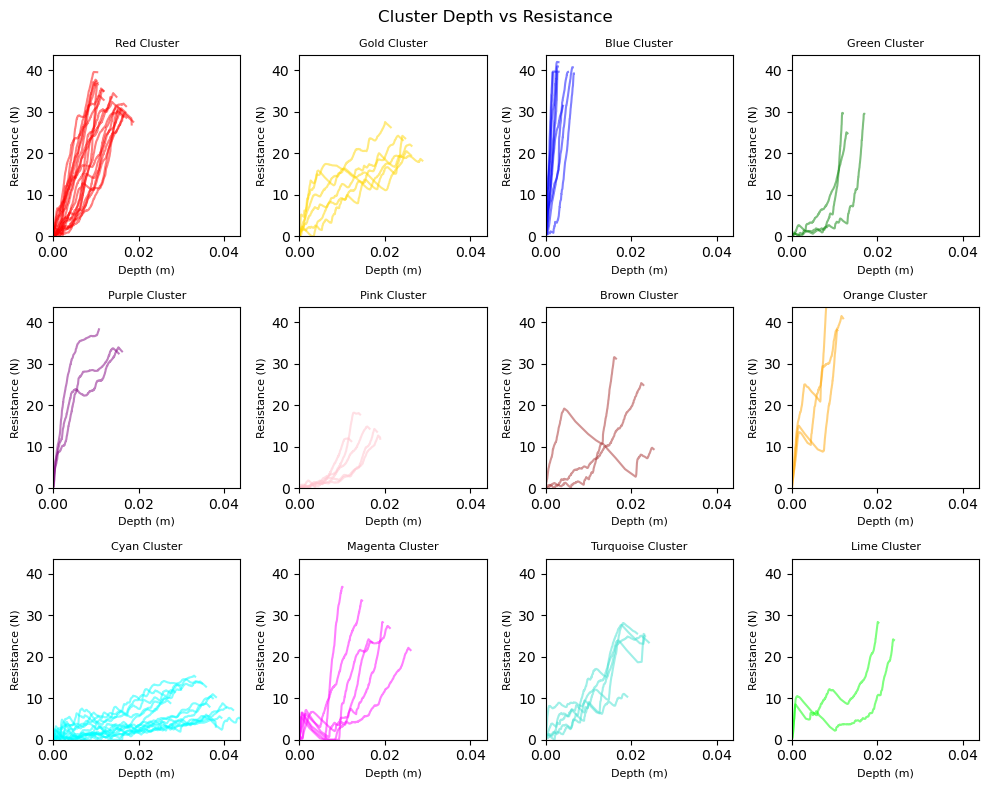

In [ ]:
# plot_clusters_together(y_labels=data_features_df['liams_ylabels'])
plotting.plot_clusters_seperately(data_features_df['liams_ylabels'], data_features_df.index.tolist(), depth_resist_curve_df_list, data_features_df)

# Clustering Marion's Labels

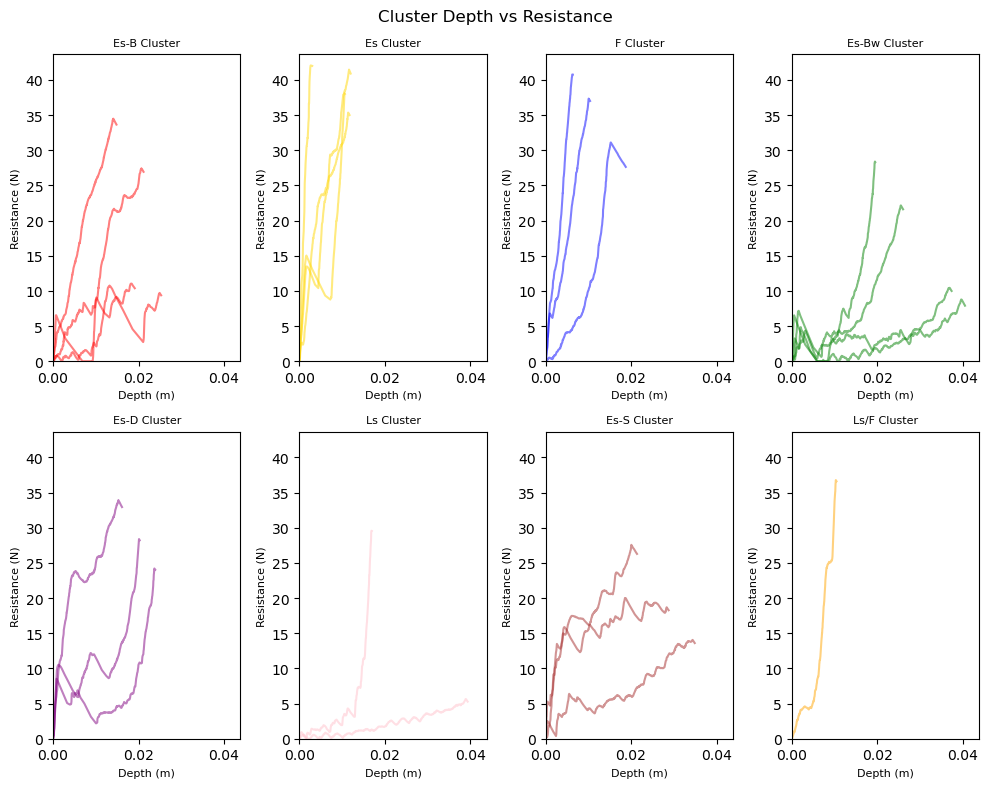

In [ ]:
marions_features_df = data_features_df[data_features_df['marions_ylabels'].notna()].copy() # removes NaN's which correspond to non-labled data
# encodes object into categorical variables
marions_features_df['encoded'], uniques = pd.factorize(marions_features_df['marions_ylabels'])
plotting.plot_clusters_seperately(marions_features_df['encoded'].tolist(), marions_features_df.index.tolist(), depth_resist_curve_df_list, data_features_df, 
                         cluster_category_names=uniques.tolist())